In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
df = pd.read_csv('D:/Annaconda/data/FB_stock.csv')
training_set = df.iloc[:, 1:2].values
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...,...
2354,2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800,0,0
2355,2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300,0,0
2356,2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200,0,0
2357,2021-09-30,340.450012,342.799988,338.149994,339.390015,16547100,0,0


In [5]:
#proses feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
#membuat prediksi 60 time-widow (3 bulan)
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
#reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=8b4d2e013c94da81edd10a4ec23f958f98ed96610141f47a8414b269f0a9d2be
  Stored in directory: c:\users\a412\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Mengimpor library Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Mulai membuat RNN
Mesin_saham = Sequential()

In [14]:
# Menambah layer LSTM yang pertama dan Dropout regularisation
Mesin_saham.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
Mesin_saham.add(Dropout(0.2))

In [15]:
# Menambah layer LSTM yang kedua dan Dropout regularisation
Mesin_saham.add(LSTM(units = 50, return_sequences = True))
Mesin_saham.add(Dropout(0.2))

In [16]:
# Menambah layer LSTM yang ketiga dan Dropout regularisation
Mesin_saham.add(LSTM(units = 50, return_sequences = True))
Mesin_saham.add(Dropout(0.2))

In [17]:
# Menambah layer LSTM yang keempat dan Dropout regularisation
Mesin_saham.add(LSTM(units = 50))
Mesin_saham.add(Dropout(0.2))

In [18]:
# Menambahkan output layer
Mesin_saham.add(Dense(units = 1))

In [19]:
# Melihat rancangan network LSTM kita
Mesin_saham.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [20]:
# Compile RNN
Mesin_saham.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
# Menjalankan RNN ke Training set
Mesin_saham.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
72/72 [==============================] - 22s 128ms/step - loss: 0.0100
Epoch 2/100
72/72 [==============================] - 9s 131ms/step - loss: 0.0027
Epoch 3/100
72/72 [==============================] - 9s 131ms/step - loss: 0.0022
Epoch 4/100
72/72 [==============================] - 9s 129ms/step - loss: 0.0020
Epoch 5/100
72/72 [==============================] - 9s 130ms/step - loss: 0.0022
Epoch 6/100
72/72 [==============================] - 9s 128ms/step - loss: 0.0019
Epoch 7/100
72/72 [==============================] - 9s 128ms/step - loss: 0.0021
Epoch 8/100
72/72 [==============================] - 9s 127ms/step - loss: 0.0022
Epoch 9/100
72/72 [==============================] - 9s 127ms/step - loss: 0.0020
Epoch 10/100
72/72 [==============================] - 10s 133ms/step - loss: 0.0019
Epoch 11/100
72/72 [==============================] - 10s 133ms/step - loss: 0.0016
Epoch 12/100
72/72 [==============================] - 9s 131ms/step - loss: 0.0015
Epoch 13/1

In [30]:
# Mengimpor data saham sesungguhnya untuk Test set
df_test = pd.read_csv('D:/Annaconda/data/FB_Stock_real.csv')
saham_real = df_test.iloc[:, 1:2].values

In [31]:
# Memprediksi harga saham
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, saham_real.shape[0] + X_train.shape[1]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = Mesin_saham.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

79/79 [==============================] - 6s 76ms/step


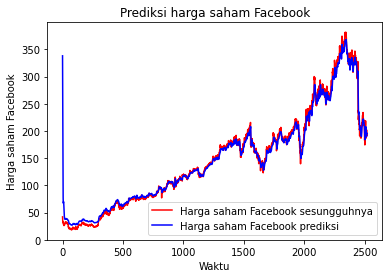

In [32]:
# Visualisasi perbandingan hasil prediksi dan data sesunguhnya
plt.plot(saham_real, color = 'red', label = 'Harga saham Facebook sesungguhnya')
plt.plot(predicted_stock_price, color = 'blue', label = 'Harga saham Facebook prediksi')
plt.title('Prediksi harga saham Facebook')
plt.xlabel('Waktu')
plt.ylabel('Harga saham Facebook')
plt.legend()
plt.show()